### Análise Exploratória de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_d_2010 = pd.read_csv('discurso - novo/discursos/2010_discursos.csv', sep=";", encoding="utf-8")
df_d_2011 = pd.read_csv('discurso - novo/discursos/2011_discursos.csv', sep=";", encoding="utf-8")
df_d_2012 = pd.read_csv('discurso - novo/discursos/2012_discursos.csv', sep=";", encoding="utf-8")
df_d_2013 = pd.read_csv('discurso - novo/discursos/2013_discursos.csv', sep=";", encoding="utf-8")
df_d_2014 = pd.read_csv('discurso - novo/discursos/2014_discursos.csv', sep=";", encoding="utf-8")
df_d_2015 = pd.read_csv('discurso - novo/discursos/2015_discursos.csv', sep=";", encoding="utf-8")
df_d_2016 = pd.read_csv('discurso - novo/discursos/2016_discursos.csv', sep=";", encoding="utf-8")
df_d_2017 = pd.read_csv('discurso - novo/discursos/2017_discursos.csv', sep=";", encoding="utf-8")
df_d_2018 = pd.read_csv('discurso - novo/discursos/2018_discursos.csv', sep=";", encoding="utf-8")
df_d_2019 = pd.read_csv('discurso - novo/discursos/2019_discursos.csv', sep=";", encoding="utf-8")

In [3]:
df_d_2010_ge = df_d_2010.query("Fase in ['GRANDE EXPEDIENTE ']")
df_d_2011_ge = df_d_2011.query("Fase in ['GRANDE EXPEDIENTE ']")
df_d_2012_ge = df_d_2012.query("Fase in ['GRANDE EXPEDIENTE ']")
df_d_2013_ge = df_d_2013.query("Fase in ['GRANDE EXPEDIENTE ']")
df_d_2014_ge = df_d_2014.query("Fase in ['GRANDE EXPEDIENTE ']")
df_d_2015_ge = df_d_2015.query("Fase in ['GRANDE EXPEDIENTE ']")
df_d_2016_ge = df_d_2016.query("Fase in ['GRANDE EXPEDIENTE ']")
df_d_2017_ge = df_d_2017.query("Fase in ['GRANDE EXPEDIENTE ']")
df_d_2018_ge = df_d_2018.query("Fase in ['GRANDE EXPEDIENTE ']")
df_d_2019_ge = df_d_2019.query("Fase in ['GRANDE EXPEDIENTE ']")

In [4]:
df_discursos = pd.concat([df_d_2010_ge, df_d_2011_ge, df_d_2012_ge, df_d_2013_ge, df_d_2014_ge, 
                       df_d_2015_ge, df_d_2016_ge, df_d_2017_ge, df_d_2018_ge, df_d_2019_ge])
ano_list = []
for i in df_discursos['Data']:
    ano_list.append(i.split('/')[2])
df_discursos['Ano'] = ano_list
df_discursos.head()

,Data,Sessão,Fase,Discurso,Hora,Publicação,NomeOrador,Partido,Estado,TextoDiscurso,Ano
19,25/02/2010,020.4.53.O,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=020.4.53.O &nu...,16h06,DCD09/03/2010 PAG. 6785,PAES LANDIM,PTB,PI,"O SR. PAES LANDIM (PTB-PI.) - Sr. Presidente,...",2010
20,25/02/2010,020.4.53.O,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=020.4.53.O &nu...,16h06,DCD26/02/2010 PAG. 4975,CARLOS ABICALIL,PT,MT,O SR. CARLOS ABICALIL (PT-MT. Sem revisão do o...,2010
21,25/02/2010,020.4.53.O,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=020.4.53.O &nu...,15h39,DCD26/02/2010 PAG. 4971,LIRA MAIA,DEM,PA,O SR. LIRA MAIA (DEM-PA. Sem revisão do orador...,2010
22,25/02/2010,020.4.53.O,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=020.4.53.O &nu...,15h39,DCD26/02/2010 PAG. 4975,FERNANDO MARRONI (PRESIDENTE),PT,RS,O SR. PRESIDENTE (Fernando Marroni) - Deputado...,2010
23,25/02/2010,020.4.53.O,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=020.4.53.O &nu...,15h12,DCD26/02/2010 PAG. 4961,JOÃO PAULO CUNHA,PT,SP,O SR. JOÃO PAULO CUNHA (PT-SP. Sem revisão do ...,2010


In [5]:
# Ajustando siglas de partidos
df_discursos['Partido'] = df_discursos['Partido'].replace(['PTN', 'PODEMOS'], 'PODE')
df_discursos['Partido'] = df_discursos['Partido'].replace(['PTDOB'], 'AVANTE')
df_discursos['Partido'] = df_discursos['Partido'].replace(['PEN', 'PATRIOTA'], 'PATRI')
df_discursos['Partido'] = df_discursos['Partido'].replace(['PFL'], 'DEM')
df_discursos['Partido'] = df_discursos['Partido'].replace(['PMDB'], 'MDB')
df_discursos['Partido'] = df_discursos['Partido'].replace(['PSDC'], 'DC')
df_discursos['Partido'] = df_discursos['Partido'].replace(['PR'], 'PL')
df_discursos['Partido'] = df_discursos['Partido'].replace(['PMR', 'PBR'], 'REPUBLICANOS')
df_discursos['Partido'] = df_discursos['Partido'].replace(['PPS'], 'CIDADANIA')
df_discursos['Partido'] = df_discursos['Partido'].replace(['SOLIDARIEDAD'], 'SOLIDARIEDADE')

In [6]:
# Removendo valores nulos
a = df_discursos.shape[0]
df_d = df_discursos.dropna()
b = df_discursos.shape[0]
print ("Removidas", (a - b), "linhas")

Removidas 0 linhas


In [7]:
df_d = pd.DataFrame()
anos = []
partidos = []
parlamentares = []
discursos = []
for ano, part, parl, texto in zip(df_discursos['Ano'], df_discursos['Partido'], df_discursos['NomeOrador'], df_discursos['TextoDiscurso']):
    if(ano == '2010'):
        partidos_com_representantes = ['PT', 'PP', 'CIDADANIA', 'PCDOB', 'PMN', 'MDB', 'DEM', 'PSB', 'PDT', 'PTB', 'PL', 'PSDB', 'PV', 'PSC', 
                     'PAN', 'PTC', 'PHS', 'PSOL', 'PRONA'] # Retirado PTDOB E PRB por terem somente um representante
    elif(ano in ['2011', '2012', '2013', '2014']):
        partidos_com_representantes = ['PT', 'MDB', 'PL', 'PSB', 'PDT', 'PSC', 'PCDOB', 'REPUBLICANOS', 'PODE', 'PSDB', 'DEM', 'PTB', 'CIDADANIA', 
                     'PMN', 'AVANTE', 'PP', 'PV', 'PSOL', 'PHS', 'PRTB', 'PRP'] # Retirado PTC e PSL por terem somente um representante
    elif(ano in ['2015', '2016', '2017', '2018']):
        partidos_com_representantes = ['PT', 'MDB', 'PL', 'PDT', 'REPUBLICANOS', 'PROS', 'PSD', 'PP', 'PSDB', 'DEM', 'PTB', 'PMN', 'SD', 'PTC', 'PODE', 
                    'PATRI', 'PSB', 'PRP', 'CIDADANIA', 'PHS', 'PV', 'PSOL', 'PSC', 'DC', 'PCDOB'] # Retirado PCdoB, PRTB e PSL por terem somente um representante
    elif(ano == '2019'):
        partidos_com_representantes = ['PT', 'PSL', 'PP', 'MDB', 'PSD', 'PL', 'PSB', 'PRB', 'PSDB', 'DEM', 'PDT', 'SD', 'PODE', 'PTB', 'PSOL', 
                    'PCDOB', 'PSC', 'PROS', 'CIDADANIA', 'NOVO', 'AVANTE', 'PHS', 'PATRI', 'PV', 'PRP', 'PMN', 'PTC'] # Retirados DC, PPL e REDE por terem somente um representante
    if(part in partidos_com_representantes):
        anos.append(ano)
        partidos.append(part)
        parlamentares.append(parl)
        discursos.append(texto)
            
df_d['Ano'] = anos
df_d['Partido'] = partidos
df_d['Parlamentar'] = parlamentares
df_d['Discurso'] = discursos
df_d.head(10)

,Ano,Partido,Parlamentar,Discurso
0,2010,PTB,PAES LANDIM,"O SR. PAES LANDIM (PTB-PI.) - Sr. Presidente,..."
1,2010,PT,CARLOS ABICALIL,O SR. CARLOS ABICALIL (PT-MT. Sem revisão do o...
2,2010,DEM,LIRA MAIA,O SR. LIRA MAIA (DEM-PA. Sem revisão do orador...
3,2010,PT,FERNANDO MARRONI (PRESIDENTE),O SR. PRESIDENTE (Fernando Marroni) - Deputado...
4,2010,PT,JOÃO PAULO CUNHA,O SR. JOÃO PAULO CUNHA (PT-SP. Sem revisão do ...
5,2010,DEM,EDUARDO SCIARRA,O SR. EDUARDO SCIARRA (DEM-PR. ...
6,2010,PT,GILMAR MACHADO,O SR. GILMAR MACHADO (PT-MG. Sem revisão do or...
7,2010,PT,ZEZÉU RIBEIRO,O SR. ZEZÉU RIBEIRO (PT-BA. Pela ordem. Sem re...
8,2010,PT,EUDES XAVIER,O SR. EUDES XAVIER (PT-CE. Pela ordem. Sem rev...
9,2010,PT,PEDRO WILSON,O SR. PEDRO WILSON (PT-GO. Pela ordem. Sem rev...


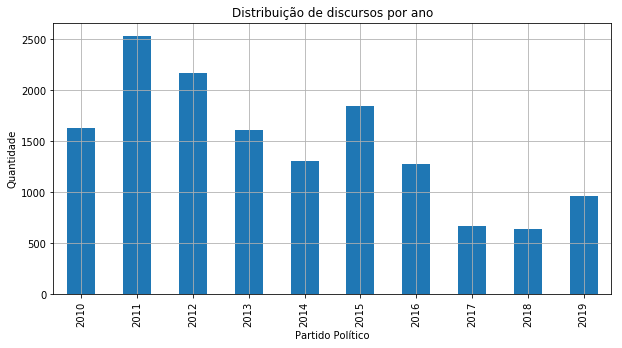

In [8]:
df_plot1 = df_d.groupby('Ano').count().Discurso
df_plot1.plot(kind='bar', figsize=(10,5), grid=True, rot=90)#, color='darkblue')
plt.title('Distribuição de discursos por ano')
plt.xlabel('Partido Político')
plt.ylabel('Quantidade')
plt.show()

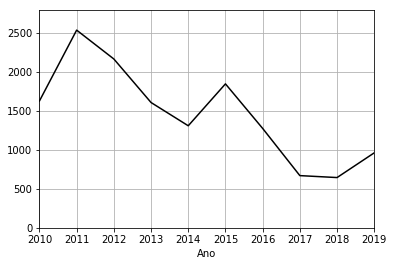

In [9]:
x = df_plot1.index
y = df_plot1.values
df_plot1.plot(figsize=(6,4), grid=True, color='k')
#plt.scatter(x, y)
plt.ylim(0,max(y, key=int)+(max(y, key=int) * 0.1))
plt.show()

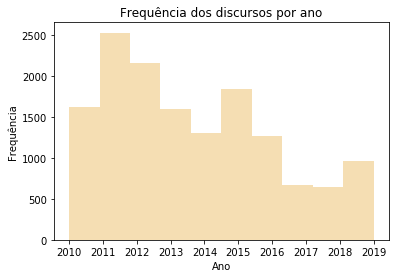

In [10]:
x = df_plot1.index
y = df_plot1.values
plt.hist(df_d['Ano'].tolist(), bins=10, color='#F5DEB3')
#plt.plot(y, '-', color='#4682B4')
plt.title('Frequência dos discursos por ano')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.show()

In [11]:
xlist = []
for i in df_d['Ano']:
    xlist.append(int(i))

[Text(0, 0.5, 'Densidade'),
 Text(0.5, 0, 'Ano'),
 Text(0.5, 1.0, 'Densidade dos discursos por ano')]

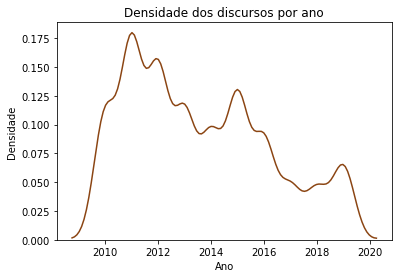

In [12]:
import seaborn as sns
ax = sns.distplot(xlist, bins=10, kde=True, hist=False, color='#8B4513')
ax.set(xlabel='Ano', ylabel='Densidade', title='Densidade dos discursos por ano')

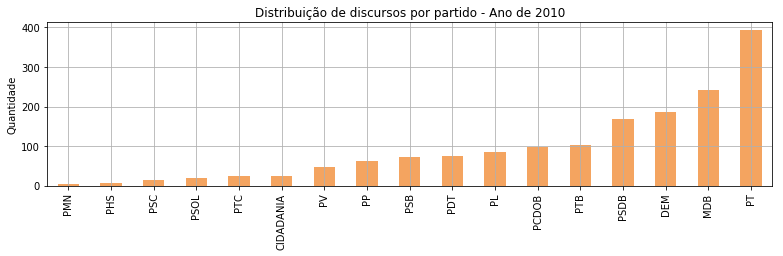

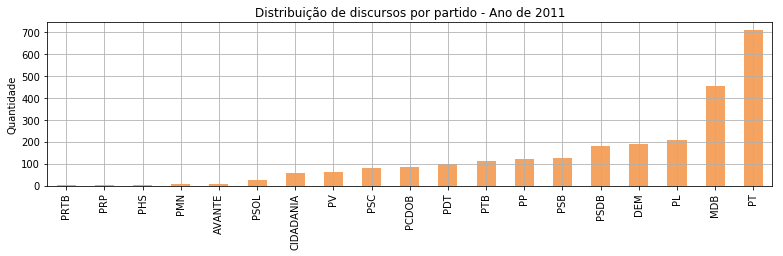

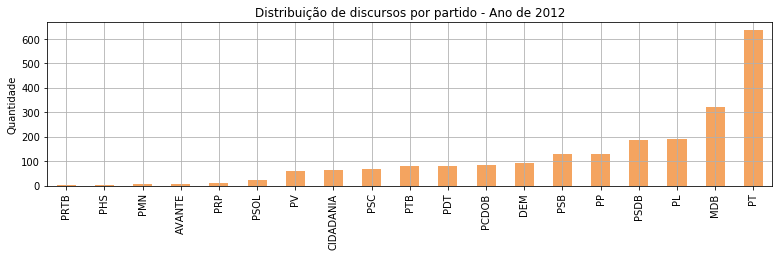

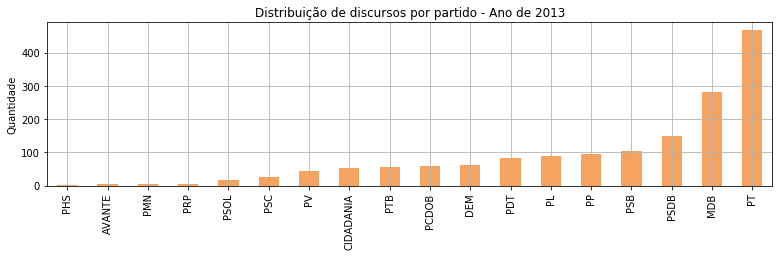

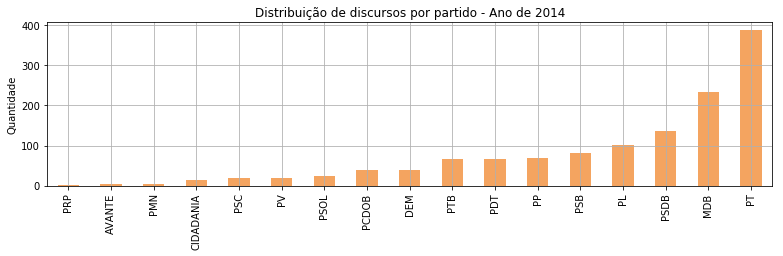

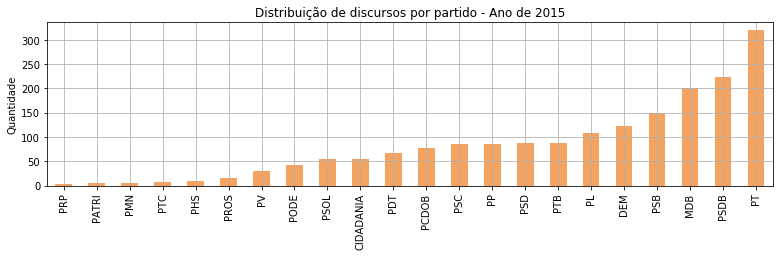

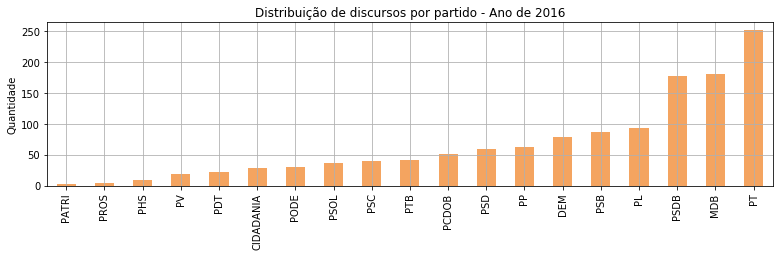

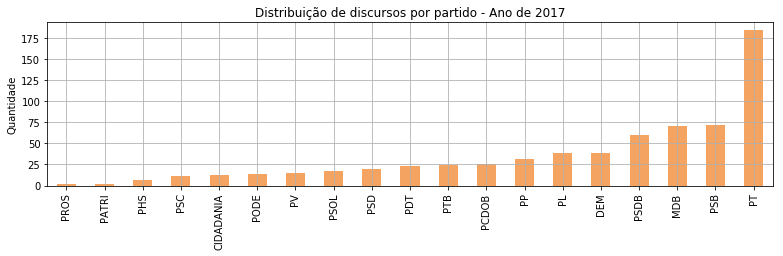

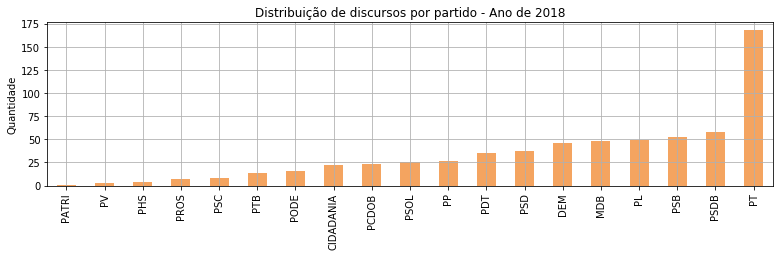

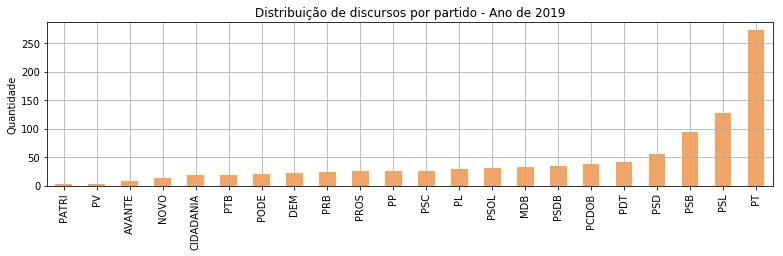

In [13]:
anos = sorted(set(anos))
for i in anos:
    df_db = df_d.query("Ano=='"+i+"'")
    disc_por_partido = df_db.groupby('Partido').count().Discurso
    disc_por_partido.sort_values(ascending=True).plot(kind='bar', figsize=(13,3), grid=True, rot=90, color='#F4A460')

    plt.title('Distribuição de discursos por partido - Ano de '+ i)
    plt.xlabel('')
    plt.ylabel('Quantidade')
    plt.show()

In [2]:
import nltk 
from nltk import tokenize
from unidecode import unidecode
from unicodedata import normalize
import unicodedata
import re
from nltk.stem import RSLPStemmer
from pandasql import sqldf
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


#### Pré-processamento textual

In [15]:
# Converte texto para minúsculo e remove números e caracteres especiais
def converteMinusculo(corpus):
    #converte todas as letras para minúsculo 
    corpus = corpus.apply(lambda x: x.lower())
    #remove números e caracteres especiais 
    corpus = corpus.apply(lambda x: re.sub('[0-9]|_|\"|%|;|!|\?|,|\.|/|$|\(|\)|-|\+|:|•', ' ', x))
    return corpus

# Removendo acentuação
from unidecode import unidecode
def removeAcentos(corpus):
    corpus = corpus.apply(lambda x: unidecode(x))
#    corpus = corpus.apply(lambda x: re.sub(u'[^a-zA-Z0-9: ]', '', x.encode().decode('utf-8')))
    return corpus

# Removendo StopWords
def stopWords(descricao):

    token_espaco = tokenize.WhitespaceTokenizer()
    palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
    # Retirar também letras soltas e as siglas dos estados brasileiros
    palavras_irrelevantes2 = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','w','z','sr','sra','bloco','ordem','revisao','orador',
                              'ac','al','ap','am','ba','ce','df','es','go','ma','mt','ms','mg','pa','pb','pr','pe','pi','rr','ro','rj','rn','rs','sc','sp','se','to']

# como foi retirado os acentos da base, também é necessário retirar das StopWords
    palavras_irrelevantes = [unidecode(texto) for texto in palavras_irrelevantes]

    frase_processada = []
    for word in descricao:
        nova_frase = []
        palavras_texto = token_espaco.tokenize(word)
        for palavra in palavras_texto:
            if palavra not in palavras_irrelevantes:
                if palavra not in palavras_irrelevantes2:
                    nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    return frase_processada

import json, requests 
import xml.etree.ElementTree as ET
from nltk.tokenize import word_tokenize

def getDeputados():
    import unidecode
    url_deputados = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"
    response = requests.get(url_deputados)
    dados_req = response.content
    nome = []
    obj = json.loads(dados_req)
    for dado in obj['dados']:
        nome.append(dado['nome'])
    nomeParlamentar = []
    tokenized = [word_tokenize(i) for i in nome]
    for x in tokenized:
        for y in x:
            if(y not in ['Professor', 'Professora', 'Pastor', 'Pastora', 'Delegado', 'Policial', 'Sargento']):
                #nm_dpt = re.sub(u'[^a-zA-Z0-9: ]', '', y.encode().decode('utf-8'))
                nm_dpt = unidecode.unidecode(y)
                nomeParlamentar.append(nm_dpt.lower())
    return nomeParlamentar

# Retira palavras desnecessárias
def retiraPalavras(descricao):
    token_espaco = tokenize.WhitespaceTokenizer()
    parlamentares = getDeputados()
    partidos = []
    for i in partidos_com_representantes:
        partidos.append(i.lower())
    
    frase_processada = []
    for word in descricao:
        nova_frase = []
        palavras_texto = token_espaco.tokenize(word)
        for palavra in palavras_texto:
            if palavra not in partidos:
                if palavra not in parlamentares:
                    nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    return frase_processada

In [16]:
df = df_d
# Reescrevendo em minúsculo e removendo números e caracteres especiais
df["Discurso"] = converteMinusculo(df["Discurso"])
print("Convertido texto para minúsculo")
print("Removido caracteres especiais")

# Removendo acentuação
df['Discurso'] = removeAcentos(df['Discurso'])
print("Removido acentuação")

# Removendo StopWorlds
df["Discurso"] = stopWords(df['Discurso'])
print("Removido stopwords")

# Removendo palavras desnecessárias
df["Discurso"] = retiraPalavras(df['Discurso'])
print("Removidas stopwords adicionais")

Convertido texto para minúsculo
Removido caracteres especiais
Removido acentuação
Removido stopwords
Removidas stopwords adicionais


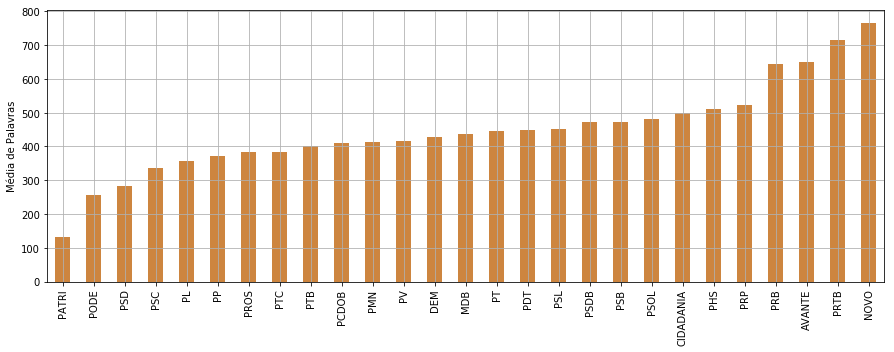

In [17]:
import nltk 
from nltk import tokenize
token_espaco = tokenize.WhitespaceTokenizer()
qtd_words = []
part_words = []
for frase, partido in zip(df['Discurso'].tolist(), df['Partido']):
    palavras_texto = token_espaco.tokenize(frase)
    part_words.append(partido)
    qtd_words.append(len(palavras_texto))

df_qtd_words = pd.DataFrame()
df_qtd_words['Partido'] = part_words
df_qtd_words['Qtd'] = qtd_words
media_palavras = df_qtd_words.groupby(["Partido"]).mean()["Qtd"]
media_palavras.sort_values(ascending=True).plot(kind='bar', figsize=(15,5), color='#CD853F', grid=True, rot=90)
#plt.title('Média de Palavras por discursos (após o pré-processamento)')
plt.xlabel('')
plt.ylabel('Média de Palavras')
plt.show()

### Dados de Votação

In [3]:
import pandasql as ps
import numpy as np
import json, requests 
from bs4 import BeautifulSoup

In [19]:
def getProposicoes(tipo, ano):
    url_votacoes = "https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ListarProposicoesVotadasEmPlenario?ano="+ano+"&tipo="+tipo
    response = requests.get(url_votacoes)
    dados_req = BeautifulSoup(response.content, 'html.parser')
    dados_req

    codproposicao = []
    nomeproposicao = []
    datavotacao = []
    for row in dados_req.findAll("proposicao"):
        codproposicao.append(row.find('codproposicao').text)
        nomeproposicao.append(row.find('nomeproposicao').text)
        datavotacao.append(row.find('datavotacao').text)

    tipoproposicao = []
    numeroproposicao = []
    anoproposicao = []
    for i in nomeproposicao:
        tipoproposicao.append(i.split(" ")[0])
        numeroproposicao.append(i.split(" ")[1].split("/")[0])
        anoproposicao.append(i.split(" ")[1].split("/")[1])

    proposicoes = pd.DataFrame()
    proposicoes['CodProposicao'] = codproposicao
    proposicoes['TipoProposicao'] = tipoproposicao
    proposicoes['NumeroProposicao'] = numeroproposicao
    proposicoes['AnoProposicao'] = anoproposicao
    proposicoes['DataVotacao'] = datavotacao
    return proposicoes

In [20]:
anos = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
df_votacoes = pd.DataFrame()
for ano in anos:
    tipo = ["PEC", "MPV", "PLP", "PL"]
    proposicoes = pd.DataFrame(columns=["CodProposicao","TipoProposicao","NumeroProposicao","AnoProposicao","DataVotacao"])
    for t in tipo:
        proposicoes = pd.concat([proposicoes, getProposicoes(t, ano)])
    df_votacoes = pd.concat([df_votacoes, proposicoes])

In [21]:
ano_list = []
for i in df_votacoes['DataVotacao']:
    ano_list.append(i.split('/')[2])
df_votacoes['Ano'] = ano_list
df_votacoes.head()

,CodProposicao,TipoProposicao,NumeroProposicao,AnoProposicao,DataVotacao,Ano
0,114145,PEC,47,2003,03/02/2010,2010
1,414367,PEC,300,2008,02/03/2010,2010
2,414367,PEC,300,2008,03/03/2010,2010
3,463451,PEC,446,2009,06/07/2010,2010
4,483907,PEC,507,2010,14/12/2010,2010


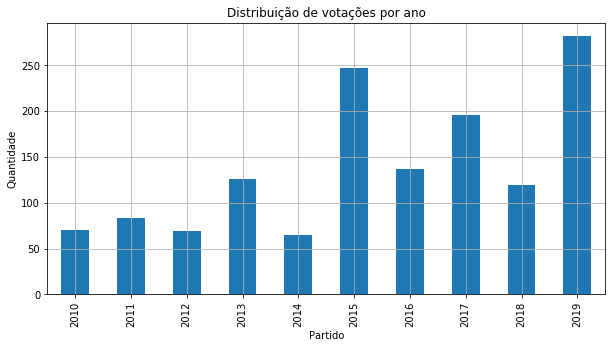

In [22]:
df_plot2 = df_votacoes.groupby('Ano').count().DataVotacao
df_plot2.plot(kind='bar', figsize=(10,5), grid=True, rot=90)#, color='darkblue')
plt.title('Distribuição de votações por ano')
plt.xlabel('Partido')
plt.ylabel('Quantidade')
plt.show()

In [23]:
# média de votações entre 2010 e 2014
df_plot2.iloc[:5].mean()

82.6

In [24]:
# média de votações entre 2015 e 2019
df_plot2.iloc[-5:10].mean()

196.0

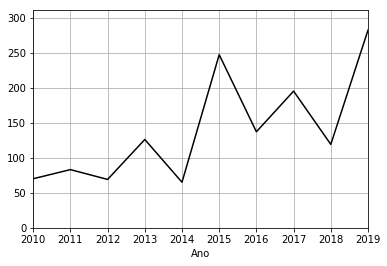

In [25]:
x = df_plot2.index
y = df_plot2.values
df_plot2.plot(figsize=(6,4), grid=True, color='k')
#plt.scatter(x, y)
plt.ylim(0,max(y, key=int)+(max(y, key=int) * 0.1))
plt.show()

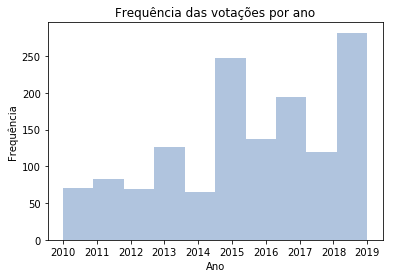

In [26]:
x = df_plot2.index
y = df_plot2.values
plt.hist(df_votacoes['Ano'].tolist(), bins=10, color='#B0C4DE')
#plt.plot(y, '-', color='#4682B4')
plt.title('Frequência das votações por ano')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.show()

In [27]:
xlist = []
for i in df_votacoes['Ano']:
    xlist.append(int(i))

[Text(0, 0.5, 'Densidade'),
 Text(0.5, 0, 'Ano'),
 Text(0.5, 1.0, 'Densidade das votações por ano')]

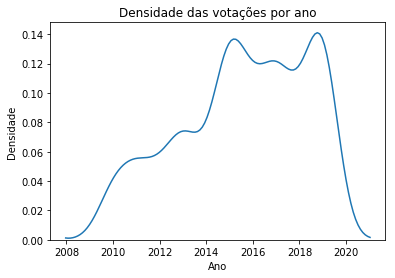

In [28]:
import seaborn as sns
ax = sns.distplot(xlist, bins=10, kde=True, hist=False)
ax.set(xlabel='Ano', ylabel='Densidade', title='Densidade das votações por ano')

#### Extraindo os dados de votos dos parlamentares

In [29]:
def extraiVotosParlamentar(proposicoes_in):
    dfVotosParlamentares = pd.DataFrame(columns=["CodSessao","IdParlamentar","Parlamentar","Partido","Uf","Voto","ObjVotacao","Data"])
    df_proposicoes = proposicoes_in.drop_duplicates(subset=['CodProposicao', 'TipoProposicao', 'NumeroProposicao', 'AnoProposicao'])
    for x, y, z in zip(df_proposicoes['TipoProposicao'], df_proposicoes['NumeroProposicao'], df_proposicoes['AnoProposicao']):
        print("----------------")
        print(x,y,z)
        varprop = x + " " + y + " " + z
        url = "https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo="+x+"&numero="+y+"&ano="+z
        header = { 'Accept': 'application/xml' }
        response = requests.get(url)
        dadosxml = BeautifulSoup(response.content, 'html.parser')
        print(url)
        for votacao in dadosxml.findAll("votacoes"):
            linhas = votacao.findAll('votacao')
            for tag in linhas:
                print(tag.get('data'), "|", tag.get('codsessao'), "-", tag.get('objvotacao'))
                df_votos = votosParlamentar(dadosxml, tag.get('codsessao'), varprop)
                dfVotosParlamentares = pd.concat([dfVotosParlamentares, df_votos])
    return dfVotosParlamentares

In [30]:
# capturando informação da votação
def votosParlamentar(dadosxml, codsessao, varprop):
    dados = dadosxml.find('votacao', codsessao=codsessao)
    dataVotacao = dados.get('data')
    objVotacao = dados.get('objvotacao')
    proposicao = varprop
    
    dep_codSessao = []
    dep_objVotacao = []
    dep_proposicao =[]
    dep_id = []
    dep_data = []
    dep_nome = []
    dep_partido = []
    dep_uf = []
    dep_voto = []
    for row in dadosxml.findAll("votos"):
        cells = row.findAll('deputado')
        for tag in cells:
            dep_id.append(tag.get('idecadastro'))
            dep_nome.append(tag.get('nome'))
            dep_partido.append(tag.get('partido').replace(" ",""))
            dep_uf.append(tag.get('uf'))
            dep_voto.append(tag.get('voto').replace(" ",""))
            dep_codSessao.append(codsessao)
            dep_objVotacao.append(objVotacao)
            dep_data.append(dataVotacao)
            dep_proposicao.append(proposicao)
    
    votacao = pd.DataFrame()
    votacao['CodSessao'] = dep_codSessao
    votacao['Proposicao'] = dep_proposicao
    votacao['IdParlamentar'] = dep_id
    votacao['Parlamentar'] = dep_nome
    votacao['Partido'] = dep_partido
    votacao['Uf'] = dep_uf
    votacao['Voto'] = dep_voto
    votacao['ObjVotacao'] = dep_objVotacao
    votacao['Data'] = dep_data
    return votacao

In [31]:
dfVotosParlamentares = extraiVotosParlamentar(df_votacoes)

----------------
PEC 47 2003
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=47&ano=2003
3/2/2010 | 3932 - SEGUNDO TURNO
3/11/2009 | 3876 - ALIMENTAÇÃO COMO DIREITO SOCIAL - PRIMEIRO TURNO
----------------
PEC 300 2008


/Users/Polato/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=300&ano=2008
3/3/2010 | 3958 - DVS Bloco EXPR. "EXTENSIVA...AMAPÁ", EMD 4 PEC 300, P/ FINAL §9º ART 144...
2/3/2010 | 3956 - EMENDA AGLUTINATIVA SUBSTITUTIVA GLOBAL Nº 1
----------------
PEC 446 2009
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=446&ano=2009
6/7/2010 | 4078 - EMENDA AGLUTINATIVA Nº 2
----------------
PEC 507 2010
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=507&ano=2010
14/12/2010 | 4193 - 1º TURNO
14/12/2010 | 4193 - 2º TURNO
----------------
MPV 472 2009
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=472&ano=2009
23/3/2010 | 3981 - REQUERIMENTO DE RETIRADA DE PAUTA
24/3/2010 | 3983 - DVS - DEM - ART. 50 DO PLV
24/3/2010 | 3982 - REQUERIMENTO DE RETIRADA DE PAUTA
24/3/2010 | 3983 - REQUERIMENTO DE RETIRADA DE PAUTA
----------------
MP

3/3/2010 | 3957 - DVS - DEM - EMENDA Nº 78
----------------
PEC 98 2007
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=98&ano=2007
29/11/2011 | 4487 - VOTAÇÃO EM 1º TURNO DO SUBSTITUTIVO DA COMISSÃO ESPECIAL
29/11/2011 | 4487 - REQUERIMENTO DE RETIRADA DE PAUTA
29/11/2011 | 4487 - DVS -PDT-EXP:" SALVO NA ETAPA DE...LASER", ART. 150, VI, e / ART.1º SUBST.
13/12/2011 | 4502 - SEGUNDO TURNO
----------------
PEC 270 2008
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=270&ano=2008
14/12/2011 | 4506 - EMENDA AGLUTINATIVA  SUBSTITUTIVA GLOBAL  DE PLENÁRIO Nº 1
14/2/2012 | 4522 - SEGUNDO TURNO
----------------
PEC 445 2009
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=445&ano=2009
13/12/2011 | 4502 - PRIMEIRO TURNO
6/3/2012 | 4540 - SEGUNDO TURNO
----------------
PEC 61 2011
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?ti

11/6/2008 | 3457 - REQUERIMENTO DE RETIRADA DE PAUTA
11/6/2008 | 3457 - SUBEMENDA SUBSTITUTIVA À EMENDA DE PLENÁRIO - CFT
18/6/2008 | 3463 - REQUERIMENTO DE RETIRADA DE PAUTA
18/6/2008 | 3464 - REQUERIMENTO DE RETIRADA DE PAUTA
21/9/2011 | 4417 - DVS - DEM - ART. 16 DA SUBEMENDA SUBSTITUTIVA GLOBAL DA CFT
----------------
PLP 87 2011
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PLP&numero=87&ano=2011
31/8/2011 | 4394 - PROJETO DE LEI COMPLEMENTAR
----------------
PL 1876 1999
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PL&numero=1876&ano=1999
11/5/2011 | 4292 - REQUERIMENTO DE RETIRADA DE PAUTA
24/5/2011 | 4305 - EMENDA SUBSTITUTIVA GLOBAL DE PLENÁRIO Nº 186
24/5/2011 | 4305 - DVS - PMDB - EMENDA Nº 164
25/4/2012 | 4596 - DVS - PT - § 7º DO ART. 62, P/ FINS DE SUA MANUTENÇÃO
25/4/2012 | 4595 - SUBSTITUTIVO DO SF - DISPOSITIVOS COM PARECER PELA REJEIÇÃO
----------------
PL 3937 2004
https://www.camara.leg.br/Si

----------------
PL 301 2007
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PL&numero=301&ano=2007
20/3/2012 | 4555 - REQUERIMENTO DE URGÊNCIA
----------------
PL 1992 2007
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PL&numero=1992&ano=2007
28/2/2012 | 4531 - SUBEMENDA SUBSTITUTIVA GLOBAL DE PLENÁRIO
29/2/2012 | 4533 - DVS - DEM - EMENDA 26
29/2/2012 | 4533 - DVS - PSDB - EMENDA 43
29/2/2012 | 4533 - DVS - PSDB - ART. 4º DO PROJETO ORIGINAL (E SEUS CORRESPONDENTES.)...
----------------
PL 5279 2009
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PL&numero=5279&ano=2009
4/8/2009 | 3782 - REQUERIMENTO DE URGÊNCIA
20/3/2012 | 4555 - REQUERIMENTO DE RETIRADA DE PAUTA
----------------
PL 643 2011
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PL&numero=643&ano=2011
13/6/2012 | 4648 - EMENDA DO RELATOR DA CCJC
----------------
PL 865 2011
https://w

28/5/2013 | 4930 - DVS - DEM - EMENDA Nº 45
----------------
MPV 602 2012
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=602&ano=2012
23/4/2013 | 4888 - PARECER DA C.M. P/ ATEND. DOS PRESSUPOSTOS CONSTITUCIONAIS
----------------
MPV 605 2013
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=605&ano=2013
28/5/2013 | 4929 - DVS - PPS - EMENDA Nº 24
----------------
MPV 608 2013
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=608&ano=2013
12/6/2013 | 4946 - DVS PPS - EMENDA Nº 7
----------------
MPV 609 2013
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=609&ano=2013
11/6/2013 | 4943 - DVS - PSD - EMENDA Nº 7
11/6/2013 | 4943 - DVS - PSDB - ART. 14 DO PLV
11/6/2013 | 4944 - DVS - DEM - EMENDA Nº 52
----------------
MPV 613 2013
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tip

3/2/2015 | 5436 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - SEGUNDO TURNO
11/11/2014 | 5386 - SUBSTITUTIVO DA COMISSÃO ESPECIAL - PRIMEIRO TURNO
11/11/2014 | 5386 - DVS - PSDB - EMENDA AGLUTINATIVA Nº 1
----------------
PEC 247 2013
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=247&ano=2013
19/2/2014 | 5170 - 1º TURNO - SUBSTITUTIVO DA COMISSÃO ESPECIAL
12/3/2014 | 5190 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - SEGUNDO TURNO
----------------
PEC 290 2013
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=290&ano=2013
25/3/2014 | 5203 - SUBSTITUTIVO DA COMISSÃO ESPECIAL - 1º TURNO
23/4/2014 | 5237 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - SEGUNDO TURNO
----------------
PEC 293 2013
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=293&ano=2013
5/2/2014 | 5154 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - 1º TURNO
5/2/2014 | 5154 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - 2º TURNO


----------------
PEC 215 2003
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=215&ano=2003
20/10/2015 | 5701 - SUBSTITUTIVO DA COMISSÃO ESPECIAL - PRIMEIRO TURNO
3/11/2015 | 5715 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - SEGUNDO TURNO
----------------
PEC 457 2005
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=457&ano=2005
4/3/2015 | 5459 - PREFERÊNCIA PARA VOTAÇÃO DA PEC 457/05 SOBRE O SUBSTITUTIVO
4/3/2015 | 5459 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - PRIMEIRO TURNO
4/3/2015 | 5459 - EMENDAS DE 1 A 11 COM PARECER FAVORÁVEL
5/5/2015 | 5518 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - SEGUNDO TURNO
5/5/2015 | 5518 - DVS - PT - ART. 2º
----------------
PEC 475 2005
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=475&ano=2005
5/5/2015 | 5518 - REQUERIMENTO DE ENCERRAMENTO DA DISCUSSÃO
----------------
PEC 590 2006
https://www.camara.leg.br/SitCamaraWS/Proposicoes

7/5/2015 | 5522 - DVS - PSDB - INCISO I DO ART. 3º DA LEI 7998/90
7/5/2015 | 5523 - DVS - PMDB - ART. 2º DO PLV
7/5/2015 | 5523 - DVS - PDT - EMENDA 68
7/5/2015 | 5522 - DVS - DEM - ART. 3º DA LEI 7998/90
7/5/2015 | 5522 - EMENDA AGLUTINATIVA Nº 1
7/5/2015 | 5523 - DVS - PSDB - § 8º DO ART. 2º DA LEI 10.779/2003
----------------
MPV 668 2015
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=668&ano=2015
19/5/2015 | 5535 - PROJETO DE LEI DE CONVERSÃO
19/5/2015 | 5535 - DVS 13 - PSDB - § 1º-A DO ART 15 DA LEI 1.086/04, PROPOSTO PELO ART 1º DO PLV
19/5/2015 | 5535 - DVS 9 - PSD - § 1º E CONSEQ. SEUS INC. I E II, DO ART 8º DA LEI 10.865/04
20/5/2015 | 5537 - DVS 6 PMDB - ART. 34-A, DA LEI 13.097/15, INCLUÍDO PELO ART. 24 DO PLV
19/5/2015 | 5535 - DVS - PPS - ART. 1º DO PLV
19/5/2015 | 5535 - DVS - PPS - ART. 1º DO PLV
19/5/2015 | 5535 - DVS - DEM  - §§ 1º E 2º DO ART 8º DA LEI 10.865/2004
19/5/2015 | 5535 - RECURSO PARA ADMISSÃO DO ART. 5º
20/5/2

https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PLP&numero=124&ano=2015
23/9/2015 | 5671 - PROJETO DE LEI COMPLEMENTAR
23/9/2015 | 5671 - EMENDAS DE PLENÁRIO DE NºS 3 E 5 COM PARECER FAVORÁVEL
----------------
PL 2479 2000
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PL&numero=2479&ano=2000
20/8/2015 | 5633 - REQUERIMENTO DE PREFERÊNCIA PARA O TEXTO ORIGINAL
----------------
PL 2505 2000
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PL&numero=2505&ano=2000
23/4/2015 | 5507 - DVS PSDB - EMENDA Nº 6
----------------
PL 4330 2004
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PL&numero=4330&ano=2004
8/4/2015 | 5493 - REQ. PARA VOTAÇÃO NOMINAL DO REQ. DE RETIRADA DE PAUTA
8/4/2015 | 5494 - SUBEMENDA SUBSTITUTIVA
14/4/2015 | 5499 - DVS - PSDB - EXPR. "ÀS EMPRESAS PÚBLICAS, ÀS SOCIED. DE ECONOMIA MISTA...
22/4/2015 | 5505 - EMENDA AGLUTINATIVA Nº 1

30/11/2016 | 6076 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - 2º TURNO
----------------
PEC 241 2016
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=241&ano=2016
10/10/2016 | 6025 - SUBSTITUTIVO DA COMISSÃO ESPECIAL - PRIMEIRO TURNO
25/10/2016 | 6043 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - SEGUNDO TURNO
10/10/2016 | 6024 - REQUERIMENTO DE RETIRADA DE PAUTA
10/10/2016 | 6024 - REQUERIMENTO DE PRORROGAÇÃO DA SESSÃO POR 1 HORA
10/10/2016 | 6024 - REQ. DE VOTAÇÃO PELO PROCESSO NOMINAL DE TODOS OS REQUERIMENTOS À PEC 241/16
10/10/2016 | 6026 - DTQ 3: PT - EMENDA Nº 21
10/10/2016 | 6026 - DTQ 4: PT - EMENDA Nº 19
10/10/2016 | 6025 - DTQ 5: PT - ART. 102 DO ADCT CONST NO ART 1º DO SUBST. APRESENTADO A PEC 241/16
10/10/2016 | 6026 - DTQ 7: PSOL - ART. 104  ADCT CONST NO ART 1º DO SUBST. APRESENTADO A PEC 241/16
10/10/2016 | 6024 - REQUERIMENTO DE ENCERRAMENTO DA DISCUSSÃO
10/10/2016 | 6025 - REQUERIMENTO DE RETIRADA DE PAUTA
10/10/2016 | 6025 - REQUERIMENT

9/11/2016 | 6054 - DTQ 1: PCdoB - ART. 2º DO PLV
9/11/2016 | 6054 - DTQ 4: PT - §5º DO ART. 38 DA LEI Nº 4.117/1965, NA REDAÇÃO DO ART. 2º DO PLV
8/11/2016 | 6051 - REQUERIMENTO DE ADIAMENTO DA VOTAÇÃO POR 2 SESSÕES
8/11/2016 | 6052 - EMENDA AGLUTINATIVA Nº 1
9/11/2016 | 6054 - REQUERIMENTO DE RETIRADA DE PAUTA
----------------
MPV 744 2016
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=744&ano=2016
14/12/2016 | 6095 - DTQ 4: PDT - EMENDA Nº 4
14/12/2016 | 6095 - DTQ 1: PT - EMENDA Nº 11
14/12/2016 | 6095 - DTQ 9: PT - ART. 15 E, POR DECORRÊNCIA, ART. 16 E 17 DO PLV
----------------
MPV 745 2016
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=745&ano=2016
7/12/2016 | 6083 - DTQ. 4: BLOCO PP/PTB/PSC  - ART 1º EMENDA Nº 20 (161, II)
7/12/2016 | 6083 - REQUERIMENTO DE RETIRADA DE PAUTA
----------------
MPV 746 2016
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=

16/5/2017 | 16208 - PARECER DA C.M. P/ ATEND. DOS PRESSUPOSTOS CONSTITUCIONAIS...
16/5/2017 | 16209 - REQUERIMENTO DE RETIRADA DE PAUTA
16/5/2017 | 16207 - REQUERIMENTO DE INVERSÃO DE PAUTA
16/5/2017 | 16208 - DTQ. 2 - PT - EXP. "BEM COMO PERMITIR A REALIZAÇÃO DE ...
16/5/2017 | 16209 - DTQ. 5 - PCdoB - ART. 5º CONTIDO NO PLV ...
16/5/2017 | 16209 - DTQ. 4 - PT - ART. 9º DO PLV
----------------
MPV 757 2016
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=757&ano=2016
15/5/2017 | 16206 - DTQ. 1 - PT - VOTAÇÃO EM SEPARADO DO ART. 16 DO PLV
----------------
MPV 758 2016
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=758&ano=2016
16/5/2017 | 16209 - PARECER DA C.M. P/ ATEND. DOS PRESSUPOSTOS CONSTITUCIONAIS...
16/5/2017 | 16209 - REQUERIMENTO DE RETIRADA DE PAUTA
16/5/2017 | 16209 - REQUERIMENTO DE VOTAÇÃO ARTIGO POR ARTIGO
16/5/2017 | 16209 - DTQ. 9: PSDB - PREFERÊNCIA PARA O TEXTO ORIGINAL DA MPV

https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=791&ano=2017
22/11/2017 | 16404 - DTQ 1 - PT - EMENDA Nº 93
----------------
MPV 793 2017
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=793&ano=2017
23/11/2017 | 16406 - REQUERIMENTO DE VOTAÇÃO NOMINAL DO REQ. DE RETIRADA DE PAUTA
27/11/2017 | 16409 - REQUERIMENTO DE VOTAÇÃO NOMINAL DO REQ. DE RETIRADA DE PAUTA
----------------
MPV 795 2017
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=795&ano=2017
13/12/2017 | 16431 - EMENDA DO SENADO FEDERAL
29/11/2017 | 16413 - PROJETO DE LEI DE CONVERSÃO Nº 36/2017
5/12/2017 | 16419 - DTQ 6 - PDT - ART. 1º DO PLV
5/12/2017 | 16419 - DTQ 6 - PDT - ART. 1º DO PLV
5/12/2017 | 16420 - DTQ 8 - PSOL - ART. 5º DO PLV
5/12/2017 | 16420 - DTQ 11 - PV - ART. 7º DO TEXTO ORIGINAL DA MPV
29/11/2017 | 16413 - REQUERIMENTO DE VOTAÇÃO NOMINAL DO REQ. DE ENCERRAMENTO DA DISCUSS

20/2/2018 | 16453 - REQUERIMENTO DE VOTAÇÃO NOMINAL DO REQ. DE RETIRADA DE PAUTA
21/2/2018 | 16454 - REQUERIMENTO DE VOTAÇÃO NOMINAL DO REQ. DE RETIRADA DE PAUTA
----------------
MPV 801 2017
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=801&ano=2017
27/2/2018 | 16459 - DTQ 4 - PT - EMENDA Nº 6
----------------
MPV 809 2017
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=MPV&numero=809&ano=2017
24/4/2018 | 16519 - VOTAÇÃO, EM GLOBO, DAS ADMISSIBILIDADES DOS REQ. DOS DESTAQUES SIMPLES
17/4/2018 | 16512 - REQUERIMENTO DE VOTAÇÃO NOMINAL DO REQ. DE ADIAMENTO DA VOTAÇÃO POR 2 SESSÕES
17/4/2018 | 16513 - REQUERIMENTO DE RETIRADA DE PAUTA
25/4/2018 | 16522 - DTQ 11 - PSOL - §3º, DO ART. 14-A, COM REDAÇÃO DADA PELO ART. 1º DO PLV
25/4/2018 | 16522 - DTQ 2 - PCdoB - ART. 2º DO PLV
25/4/2018 | 16522 - DTQ 6 - PT - INC. III, DO ART. 12º DA LEI Nº 7957/89, ALTERADO P/ ART. 2º DO PLV
25/4/2018 | 16522 - DTQ 8 - PT -

https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PL&numero=1202&ano=2007
4/4/2018 | 16499 - REQUERIMENTO DE VOTAÇÃO NOMINAL DO REQ. DE RETIRADA DE PAUTA
4/4/2018 | 16500 - REQUERIMENTO DE VOTAÇÃO NOMINAL DO REQ. DE RETIRADA DE PAUTA
----------------
PL 3734 2012
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PL&numero=3734&ano=2012
11/4/2018 | 16507 - REDAÇÃO FINAL
11/4/2018 | 16507 - REQUERIMENTO DE RETIRADA DE PAUTA
11/4/2018 | 16507 - SUBEMENDA SUBSTITUTIVA GLOBAL
10/4/2018 | 16504 - REQUERIMENTO DE VOTAÇÃO NOMINAL DO REQ. DE RETIRADA DE PAUTA
10/4/2018 | 16505 - REQUERIMENTO DE ADIAMENTO DA VOTAÇÃO POR 1 SESSÃO
10/4/2018 | 16505 - REQUERIMENTO DE ENCERRAMENTO DA DISCUSSÃO E DO ENCAMINHAMENTO
11/4/2018 | 16507 - DTQ. 6 - PCdoB - EMENDA DE PLENÁRIO Nº 9
11/4/2018 | 16507 - DTQ. 10 - PSOL - INC. XIV, DO §2º, DO ART. 9º DO SUBSTITUTIVO
11/4/2018 | 16507 - DTQ. 12 - PSD - EMENDA DE PLENÁRIO Nº 15
11/4/2018 | 16506 - D

7/8/2019 | 16888 - DTQ. 11 - PT -  § 14 DO ART. 195 DA CF/88, NA REDAÇÃO DO ART. 1º DA PEC 6/2019
6/8/2019 | 16887 - VOTAÇÃO DA ADMISSIBILIDADE EM GLOBO DOS DESTAQUES SIMPLES
7/8/2019 | 16888 - REQUERIMENTO DE RETIRADA DE PAUTA
----------------
PEC 34 2019
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=34&ano=2019
5/6/2019 | 16828 - SUBSTITUTIVO DA COMISSÃO ESPECIAL - PRIMEIRO TURNO
5/6/2019 | 16828 - DTQ 3 - PDT - EXP: "...DE INICIATIVA DO PRESIDENTE..."
5/6/2019 | 16828 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - SEGUNDO TURNO
5/6/2019 | 16828 - DTQ 1 - PSOL - § 1º DO ART 167
5/6/2019 | 16828 - DTQ 2 - PRB - § 17 DO ART. 166
----------------
PEC 48 2019
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PEC&numero=48&ano=2019
19/11/2019 | 16991 - PROPOSTA DE EMENDA À CONSTITUIÇÃO - SEGUNDO TURNO
19/11/2019 | 16991 - SUBSTITUTIVO DA COMISSÃO ESPECIAL
----------------
MPV 852 2018
https://www.camara.leg.br/SitCama

----------------
PLP 461 2017
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PLP&numero=461&ano=2017
2/12/2019 | 17006 - REQUERIMENTO DE VOTAÇÃO ARTIGO POR ARTIGO
2/12/2019 | 17006 - SUBEMENDA SUBSTITUTIVA DE PLENÁRIO
17/12/2019 | 17027 - EMA 3: PSL: EMENDA AGLUTINATIVA Nº 3
17/12/2019 | 17027 - DTQ 8: PSL: EXPRESSÃO "DE ADOÇÃO FACULTATIVA PELOS MUNICÍPIOS...
17/12/2019 | 17027 - DTQ 9: PSL: ART. 2º DO SUBSTITUTIVO
----------------
PLP 55 2019
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PLP&numero=55&ano=2019
8/5/2019 | 16800 - SUBSTITUTIVO DA CFT
8/5/2019 | 16800 - REQUERIMENTO DE ADIAMENTO DA DISCUSSÃO POR 2 SESSÕES
8/5/2019 | 16800 - REQUERIMENTO DE VOTAÇÃO ARTIGO POR ARTIGO
8/5/2019 | 16800 - REQ. DE VOTAÇÃO NOMINAL DO REQ. DE ADIAMENTO DA DISCUSSÃO POR 2 SESSÕES
----------------
PLP 223 2019
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PLP&numero=223&ano=2019
16/12/2019

11/12/2019 | 17018 - DTQ. 15 - DEM - PREFERÊNCIA PARA O PL Nº 4.162/2019
11/12/2019 | 17017 - REQUERIMENTO DE ENCERRAMENTO DA DISCUSSÃO E DO ENCAMINHAMENTO
11/12/2019 | 17018 - REQUERIMENTO DE RETIRADA DE PAUTA
11/12/2019 | 17018 - EMENDAS COM PARECER PELA APROVAÇÃO, Nºs 15,16,17, 23
11/12/2019 | 17018 - EMENDAS COM PARECER PELA APROVAÇÃO, Nºs 15,16,17, 23
17/12/2019 | 17025 - REQUERIMENTO DE RETIRADA DE PAUTA
17/12/2019 | 17025 - DTQ 21 - PT - ART. 11 DA EMENDA Nº 17
17/12/2019 | 17026 - DTQ 1 - PCdoB - ART. 15 DO SUBSTITUTIVO
17/12/2019 | 17026 - DTQ 4 - PT - EMENDA Nº 7
17/12/2019 | 17026 - DTQ 17 - REPUBLICANOS - EMENDA Nº 18
17/12/2019 | 17026 - REQUERIMENTO DE RETIRADA DE PAUTA
----------------
PL 3723 2019
https://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ObterVotacaoProposicao?tipo=PL&numero=3723&ano=2019
5/11/2019 | 16980 - REQUERIMENTO DE ADIAMENTO DA VOTAÇÃO POR 2 SESSÕES
29/10/2019 | 16972 - REQUERIMENTO DE RETIRADA DE PAUTA
30/10/2019 | 16975 - REQUERIMENTO DE RETIRAD

In [32]:
dfVotosParlamentares.head()

,CodSessao,Data,IdParlamentar,ObjVotacao,Parlamentar,Partido,Proposicao,Uf,Voto
0,3932,3/2/2010,141380,SEGUNDO TURNO,Angela Portela,PT,PEC 47 2003,RR,Sim
1,3932,3/2/2010,141417,SEGUNDO TURNO,Edio Lopes,PMDB,PEC 47 2003,RR,Sim
2,3932,3/2/2010,141496,SEGUNDO TURNO,Marcio Junqueira,DEM,PEC 47 2003,RR,Sim
3,3932,3/2/2010,141512,SEGUNDO TURNO,Neudo Campos,PP,PEC 47 2003,RR,Sim
4,3932,3/2/2010,141551,SEGUNDO TURNO,Urzeni Rocha,PSDB,PEC 47 2003,RR,Sim


In [33]:
# Ajustando siglas de partidos
dfVotosParlamentares['Partido'] = dfVotosParlamentares['Partido'].replace(['PTN', 'PODEMOS', 'Podemos'], 'PODE')
dfVotosParlamentares['Partido'] = dfVotosParlamentares['Partido'].replace(['PTDOB', 'PTdoB', 'Avante'], 'AVANTE')
dfVotosParlamentares['Partido'] = dfVotosParlamentares['Partido'].replace(['PEN', 'PATRIOTA', 'Patriota'], 'PATRI')
dfVotosParlamentares['Partido'] = dfVotosParlamentares['Partido'].replace(['PMDB'], 'MDB')
dfVotosParlamentares['Partido'] = dfVotosParlamentares['Partido'].replace(['PFL'], 'DEM')
dfVotosParlamentares['Partido'] = dfVotosParlamentares['Partido'].replace(['PSDC'], 'DC')
dfVotosParlamentares['Partido'] = dfVotosParlamentares['Partido'].replace(['PR'], 'PL')
dfVotosParlamentares['Partido'] = dfVotosParlamentares['Partido'].replace(['PCdoB'], 'PCDOB')
dfVotosParlamentares['Partido'] = dfVotosParlamentares['Partido'].replace(['PBR', 'REPUBLICAN', 'Republican'], 'REPUBLICANOS')
dfVotosParlamentares['Partido'] = dfVotosParlamentares['Partido'].replace(['PPS'], 'CIDADANIA')
dfVotosParlamentares['Partido'] = dfVotosParlamentares['Partido'].replace(['SOLIDARIED', 'SOLIDARIEDAD', 'Solidariedad', 'Solidaried'], 'SOLIDARIEDADE')

In [139]:
#dfVotosParlamentares.to_csv('votos_todos_anos.csv', sep=';', index=False)
dfVotosParlamentares = pd.read_csv('votos_todos_anos.csv', sep=';', encoding="utf-8")
dfVotosParlamentares.head()

,CodSessao,Data,IdParlamentar,ObjVotacao,Parlamentar,Partido,Proposicao,Uf,Voto
0,3932,3/2/2010,141380,SEGUNDO TURNO,Angela Portela,PT,PEC 47 2003,RR,Sim
1,3932,3/2/2010,141417,SEGUNDO TURNO,Edio Lopes,MDB,PEC 47 2003,RR,Sim
2,3932,3/2/2010,141496,SEGUNDO TURNO,Marcio Junqueira,DEM,PEC 47 2003,RR,Sim
3,3932,3/2/2010,141512,SEGUNDO TURNO,Neudo Campos,PP,PEC 47 2003,RR,Sim
4,3932,3/2/2010,141551,SEGUNDO TURNO,Urzeni Rocha,PSDB,PEC 47 2003,RR,Sim


In [142]:
ano_list_v = []
for i in dfVotosParlamentares['Data']:
    ano_list_v.append(i.split('/')[2])
dfVotosParlamentares['Ano'] = ano_list_v
df_votos = dfVotosParlamentares.query("Ano in ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']")
df_votos.head()

,CodSessao,Data,IdParlamentar,ObjVotacao,Parlamentar,Partido,Proposicao,Uf,Voto,Ano
0,3932,3/2/2010,141380,SEGUNDO TURNO,Angela Portela,PT,PEC 47 2003,RR,Sim,2010
1,3932,3/2/2010,141417,SEGUNDO TURNO,Edio Lopes,MDB,PEC 47 2003,RR,Sim,2010
2,3932,3/2/2010,141496,SEGUNDO TURNO,Marcio Junqueira,DEM,PEC 47 2003,RR,Sim,2010
3,3932,3/2/2010,141512,SEGUNDO TURNO,Neudo Campos,PP,PEC 47 2003,RR,Sim,2010
4,3932,3/2/2010,141551,SEGUNDO TURNO,Urzeni Rocha,PSDB,PEC 47 2003,RR,Sim,2010


In [144]:
print("Base possui", df_votos.shape[0], "votos registrados.")

Base possui 7204586 votos registrados.


In [145]:
df_votos = df_votos.query("Voto in ['Sim', 'Não', 'Obstrução', 'Abstenção', 'Art.17']")
print("Base possui", df_votos.shape[0], "votos válidos.") 

Base possui 5392437 votos válidos.


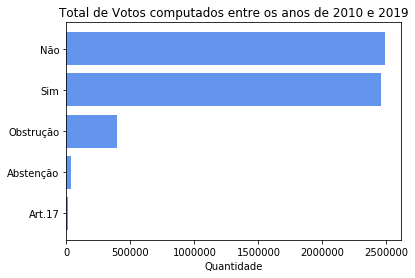

In [146]:
df_votos_plot = pd.DataFrame(df_votos.groupby('Voto').count().Proposicao)
df_votos_plot.reset_index(inplace=True)
df_votos_plot = df_votos_plot.sort_values(['Proposicao'], ascending=True)
plt.barh(df_votos_plot['Voto'], df_votos_plot['Proposicao'], color='#6495ED')
plt.title('Total de Votos computados entre os anos de 2010 e 2019')
plt.xlabel('Quantidade')
plt.show()

In [147]:
df_votos = df_votos.query("Voto in ['Sim', 'Não']")
print("Dos votos válidos,", df_votos.shape[0], "votos correspondem a Sim e Não.")
df_votos_plot2 = pd.DataFrame(df_votos.groupby(['Voto', 'Ano']).count().Proposicao)
df_votos_plot2.reset_index(inplace=True)

Dos votos válidos, 4949797 votos correspondem a Sim e Não.


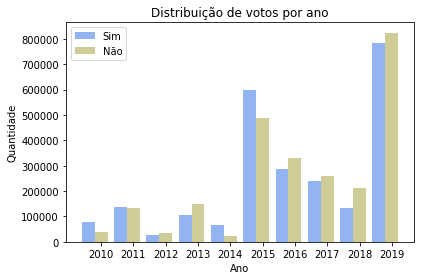

In [148]:
votos_sim = df_votos_plot2.query("Voto in ['Sim']")['Proposicao'].tolist()
votos_nao = df_votos_plot2.query("Voto in ['Não']")['Proposicao'].tolist()
grupos = 10
fig, ax = plt.subplots()
indice = np.arange(grupos)
bar_larg = 0.4
transp = 0.7
plt.bar(indice, votos_sim, bar_larg, alpha=transp, color='#6495ED', label='Sim')
plt.bar(indice + bar_larg, votos_nao, bar_larg, alpha=transp, color='#BDB76B', label='Não')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Distribuição de votos por ano')
plt.xticks(indice + bar_larg, ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'))
plt.legend()
plt.tight_layout()
plt.show()